# 線形回帰について

$Y$を目的変数、$X_i$を説明変数、および$\epsilon$を撹乱項とする

・単線形回帰

$Y = \beta_0 + \beta_1X_1 + \epsilon$

・重線形回帰

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon$

モデルの決定とは裏ではこのような数式に従って結果が出ているんだと信じて、パラメータ$\beta_0 \dots \beta_p$を推測すること

# 物件価格を予測してみよう

### データの特徴を考察する

In [2]:
# サンプルデータセットの読み込み
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# データセットの特徴を確認
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# 説明変数のデータを確認(5行)
pd.DataFrame(boston.data ,  columns=boston.feature_names).head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# カラム名
# boston.feature_names
# 型
# print(type(boston.data))
# 行数および列数
# print(boston.data.shape)

In [6]:
# 目的変数のデータを確認(5行)
pd.DataFrame(boston.target , columns=['MEDV']).head(5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 散布図でデータの特徴を確認

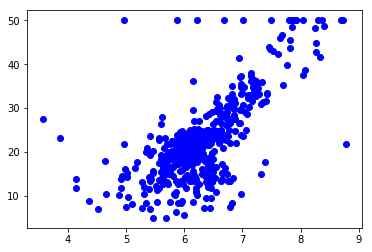

In [9]:
# 5列目(部屋数)をx軸、目的変数をy軸にプロットしてデータの傾向を確認する
from matplotlib import pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='b')
plt.show()

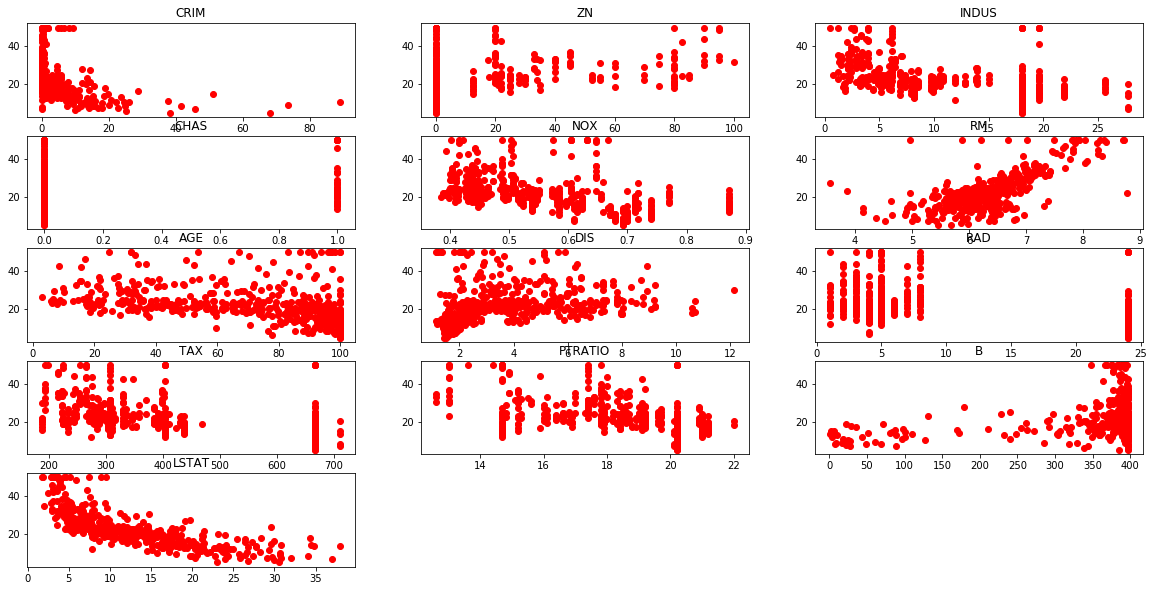

In [10]:
# 全変数に対して上記の散布図を作成する
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 10))
for i in range(13):
    j = i + 1
    axj = fig.add_subplot(5, 3, j)
    axj.set_title(boston.feature_names[i])
    axj.scatter(boston.data[:, i], boston.target, color='r')

plt.show()

### numpyによる単回帰(説明変数が1つのみ)+切片なし

In [11]:
# 説明変数
# 部屋数だけを取り出してarray形でXに格納
import numpy as np

X = boston.data[:, 5]
X = np.array([[v] for v in X])
X[1:5]

array([[6.421],
       [7.185],
       [6.998],
       [7.147]])

In [13]:
# 目的変数
Y = boston.target

In [14]:
# 最小二乗法で単回帰直線を算出する
# slope：傾き
# total_error：直線とデータのずれを足し合わせた合計値
slope, total_error , _ , _ = np.linalg.lstsq(X, Y)
print(f'{slope}, {total_error}')

[3.6533504], [29555.78152864]


C:\Users\RLSUU123304W01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


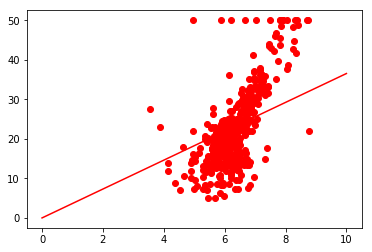

In [15]:
# 単回帰直線を描いてみる
# np.linspace：等差数列(始点、終点、配列の要素数)
plt.scatter(boston.data[:, 5], boston.target, color='r')
x = np.linspace(0, 10, 11)
y = slope * x
plt.plot(x, y, 'r-')
plt.show()

### numpyによる単回帰(説明変数が1つのみ)+切片なし

In [16]:
# 説明変数
# [v, 1] 1を記載することで切片ありの線形回帰になる
X = boston.data[:, 5]
X = np.array([[v, 1] for v in X])
X[1:5]

array([[6.421, 1.   ],
       [7.185, 1.   ],
       [6.998, 1.   ],
       [7.147, 1.   ]])

In [17]:
# 目的変数
Y = boston.target

In [18]:
# 最小二乗法で単回帰直線を算出する
# slope：傾き
# bias：切片
(slope, bias), total_error , _ , _ = np.linalg.lstsq(X, Y)
print(f'{slope}, {bias}, {total_error}')

9.102108981180313, -34.670620776438575, [22061.87919621]


C:\Users\RLSUU123304W01\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


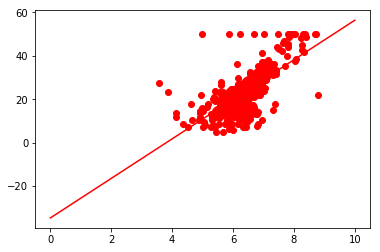

In [19]:
# 単回帰直線(切片あり)を描いてみる
plt.scatter(boston.data[:, 5], boston.target, color='r')
x = np.linspace(0, 10, 11)
y = slope * x + bias
plt.plot(x, y, 'r-')
plt.show()

### numpyによる重回帰

In [20]:
# 説明変数
# データを行ごとにばらして各行をarray形に格納する
# 各行のarray形のデータをconcatenateで結合して配列に格納する
X = [np.concatenate((v, [1])) for v in boston.data]
X[1:5]

[array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00, 1.0000e+00]),
 array([2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00, 1.0000e+00]),
 array([3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00, 1.0000e+00]),
 array([6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00, 1.0000e+00])]

In [25]:
# 目的変数
Y = boston.target

In [30]:
# 最小二乗法で単回帰直線を算出する
# slope：傾き
# total_error：直線とデータのずれを足し合わせた合計値
s, total_error, _, _ = np.linalg.lstsq(X, Y, rcond=None)
# 係数
print(f'係数 = {s}')
# 誤差合計
print(f'誤差合計 = {total_error}')
# RMSEの計算
# ルート(誤差合計値/説明変数の行数(506))
rmse = np.sqrt(total_error[0]/len(X))
print(f'RMSE = {rmse}')

係数 = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]
誤差合計 = [11078.78457795]
RMSE = 4.679191295697282


### sklearnによる重回帰
個人的にはこっちのがよく使う気がする....

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# 予測モデルを作成
lr = LinearRegression(fit_intercept=True)
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# それぞれの各データ値に対してその予測値を算出
p = lr.predict(X)

# 計算した予測値の上位10行を表示
p[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [77]:
# 決定係数を算出
from sklearn.metrics import r2_score
# 学習用データ
print(r2_score(Y,p))

0.7406426641094095


In [36]:
# RMSEの計算
# p：予測値 Y：実際の値

# 各値ごとの誤差を計算
e = p - Y
# 誤差の2乗の合計値を算出
total_error = np.sum(e * e)
# ルート(誤差合計値/説明変数の行数(506))
rmse_train = np.sqrt(total_error / len(p))
print(f'RMSE on training: {rmse_train}')

RMSE on training: 4.679191295697281


※決定係数：モデルの当てはまりの良さを示す指標。寄与率とも呼ばれる。  
※RMSE：平均平方二乗誤差。モデルの精度評価に用いられる指標の1つ。
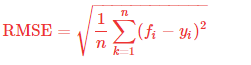  
https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1

# Sklearnを用いてクロスバリデーションでモデルを作成してみる
ここまでは全てのデータを学習用データとしてモデルを作成していた。
本来であれば学習データとテストデータに分割して実施してみるべきである。

ホールドアウト法：データ全体を学習データとテストデータに分割する方法  
クロスバリデーション法(交差確認法)：データ全体をK個に分割し、そのうちの1つのブロックをテストデータとして利用する。これをK回繰り返す  ブーストラップ法：データ全体から重複を許すサンプリングを複数回実施して学習データとテストデータを作成、これを繰り返し評価を行う。


### ホールドアウト法による予測モデルの作成

In [59]:
len(X)

506

In [78]:
from sklearn.model_selection import train_test_split
# データ全体を学習用データとテスト用データに分割する
# train_size,test_sizeの引数を指定しないとFutureWarningがでるよ
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2 ,random_state=1)

In [79]:
# 学習用データを確認してみる
print(len(X_train))
print(X_train[1:5])

print(len(Y_train))
print(Y_train[1:5])

404
[array([1.5445e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01,
       6.1450e+00, 2.9200e+01, 7.8148e+00, 8.0000e+00, 2.8400e+02,
       1.9700e+01, 3.9068e+02, 6.8600e+00, 1.0000e+00]), array([ 16.8118,   0.    ,  18.1   ,   0.    ,   0.7   ,   5.277 ,
        98.1   ,   1.4261,  24.    , 666.    ,  20.2   , 396.9   ,
        30.81  ,   1.    ]), array([5.6460e-02, 0.0000e+00, 1.2830e+01, 0.0000e+00, 4.3700e-01,
       6.2320e+00, 5.3700e+01, 5.0141e+00, 5.0000e+00, 3.9800e+02,
       1.8700e+01, 3.8640e+02, 1.2340e+01, 1.0000e+00]), array([8.79212e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.84000e-01,
       5.56500e+00, 7.06000e+01, 2.06350e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.65000e+00, 1.71600e+01, 1.00000e+00])]
404
[23.3  7.2 21.2 11.7]


In [80]:
# テスト用データを確認してみる
print(len(X_val))
print(X_val[1:5])

print(len(Y_val))
print(Y_val[1:5])

102
[array([2.5430e-02, 5.5000e+01, 3.7800e+00, 0.0000e+00, 4.8400e-01,
       6.6960e+00, 5.6400e+01, 5.7321e+00, 5.0000e+00, 3.7000e+02,
       1.7600e+01, 3.9690e+02, 7.1800e+00, 1.0000e+00]), array([2.2927e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 4.4800e-01,
       6.0300e+00, 8.5500e+01, 5.6894e+00, 3.0000e+00, 2.3300e+02,
       1.7900e+01, 3.9274e+02, 1.8800e+01, 1.0000e+00]), array([5.7890e-02, 1.2500e+01, 6.0700e+00, 0.0000e+00, 4.0900e-01,
       5.8780e+00, 2.1400e+01, 6.4980e+00, 4.0000e+00, 3.4500e+02,
       1.8900e+01, 3.9621e+02, 8.1000e+00, 1.0000e+00]), array([  3.67822,   0.     ,  18.1    ,   0.     ,   0.77   ,   5.362  ,
        96.2    ,   2.1036 ,  24.     , 666.     ,  20.2    , 380.79   ,
        10.19   ,   1.     ])]
102
[23.9 16.6 22.  20.8]


In [81]:
# 学習
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
# 予測
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

In [83]:
# 決定係数を算出
from sklearn.metrics import r2_score
# 学習用データ
print(r2_score(Y_train,y_train_pred))

#テスト用データ
print(r2_score(Y_val,y_val_pred))

0.7293585058196337
0.7634174432138472


In [88]:
# RMSEの計算

# 学習用データ
# 各値ごとの誤差を計算
e = y_train_pred - Y_train
# 誤差の2乗の合計値を算出
total_error = np.sum(e * e)
# ルート(誤差合計値/説明変数の行数(506))
rmse_train = np.sqrt(total_error / len(p))
print(f'RMSE on training: {rmse_train}')

# テスト用データ
# 各値ごとの誤差を計算
e = y_val_pred - Y_val
# 誤差の2乗の合計値を算出
total_error = np.sum(e * e)
# ルート(誤差合計値/説明変数の行数(506))
rmse_train = np.sqrt(total_error / len(p))
print(f'RMSE on training: {rmse_train}')

RMSE on training: 4.177998335155245
RMSE on training: 2.1709751369902808


# クロスバリデーションを用いた重回帰モデルの作成

In [102]:
#クロスバリデーション(学習データへの依存がなくなる)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=3, random_state=None, shuffle=False)
lr = LinearRegression(fit_intercept=True)

# 評価値(決定係数)を算出する関数
scores = cross_val_score(lr, X, Y, cv=kf)
print('Cross-Validation scores: {}'.format(scores))
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [ 0.5839083   0.53248448 -5.86898835]
Average score: -1.5841985220997892


In [110]:
# カスタムでRMSEを出してみる
import math
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

kf = KFold(n_splits=3, random_state=None, shuffle=False)
lr = LinearRegression(fit_intercept=True)

score_funcs = {
        'rmse': make_scorer(rmse_score),
    }
scores = cross_validate(lr, X, Y, cv=kf, scoring=score_funcs)
print('RMSE: {}'.format(scores['test_rmse']))
print('RMSE平均値: {}'.format(scores['test_rmse'].mean()))

RMSE: [ 4.54227981  5.87221838 21.25816743]
RMSE平均値: 10.557555207835472
